In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/91983/Downloads/ipl.csv")

In [3]:
data.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


In [4]:
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [5]:
data.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [6]:
columns_to_remove=['mid','batsman','bowler','striker','non-striker','venue']
print('Before removing unwanted columns: {}'.format(data.shape))
data.drop(labels=columns_to_remove,axis=1,inplace=True)
print('After removing unwanted columns: {}'.format(data.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [7]:
data.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [8]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [9]:
data.index

RangeIndex(start=0, stop=76014, step=1)

In [10]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [11]:
consistent_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad','Mumbai Indians']
print("Before Removing inconsistent teams: {}".format(data.shape))
data=data[(data['bat_team'].isin(consistent_teams))& (data['bowl_team'].isin(consistent_teams))]
print('After removing consistent teams: {}'.format(data.shape))

Before Removing inconsistent teams: (76014, 9)
After removing consistent teams: (53811, 9)


In [12]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [13]:
print("Before Removing first 5 overs: {}".format(data.shape))
data=data[data['overs']>=5.0]
print("After removing first 5 overs: {}".format(data.shape))

Before Removing first 5 overs: (53811, 9)
After removing first 5 overs: (40108, 9)


In [14]:
from datetime import datetime
print("Before converting: {}".format(type(data.iloc[0,0])))
data['date']=data['date'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d"))
print("After Removing: {}".format(type(data.iloc[0,0])))

Before converting: <class 'str'>
After Removing: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


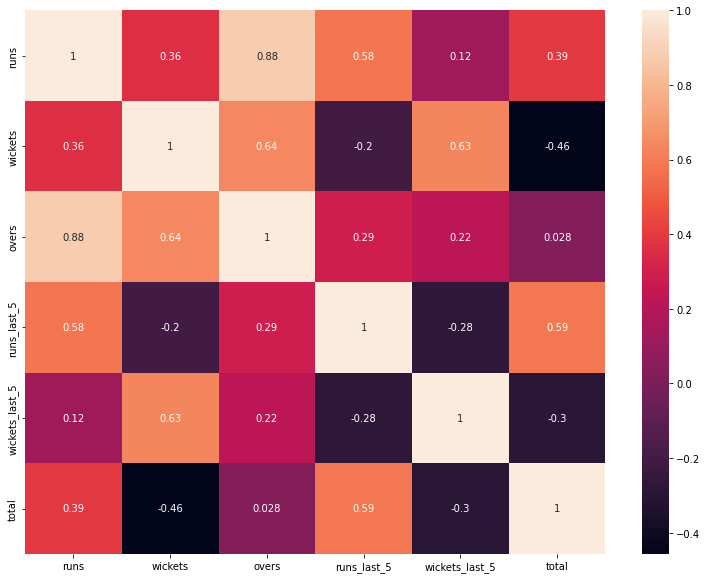

In [15]:
corr_matrix=data.corr()
top_corr_features=corr_matrix.index
plt.figure(figsize=(13,10))
g = sns.heatmap(data=data[top_corr_features].corr(),annot=True) 

In [16]:
encoded_data=pd.get_dummies(data=data,columns=['bat_team','bowl_team'])
encoded_data.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [17]:
encoded_data.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
encoded_data = encoded_data[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [19]:
X_train=encoded_data.drop(labels='total',axis=1)[encoded_data['date'].dt.year<=2016]
X_test=encoded_data.drop(labels='total',axis=1)[encoded_data['date'].dt.year<=2016]
y_train=encoded_data[encoded_data['date'].dt.year<=2016]['total'].values
y_test=encoded_data[encoded_data['date'].dt.year<=2016]['total'].values
X_train.drop(labels='date',axis=True,inplace=True)
X_test.drop(labels='date',axis=True,inplace=True)
print("Training set: {} and Test set: {}".format(X_train.shape,X_test.shape))

Training set: (37330, 21) and Test set: (37330, 21)


In [20]:
from sklearn.linear_model import LinearRegression
linear_regressor=LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred_lr=linear_regressor.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse,accuracy_score
print("-----------Linear Regression - Model Evaluation-----------")
print("Mean Absolute Error (MAE): {}".format(mae(y_test,y_pred_lr)))
print("Mean Sqaured Error (MSE): {}".format(mse(y_test,y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test,y_pred_lr))))

-----------Linear Regression - Model Evaluation-----------
Mean Absolute Error (MAE): 13.11359712859756
Mean Sqaured Error (MSE): 307.3274256781011
Root Mean Squared Error (RMSE): 17.530756563197755


In [23]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor=DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [24]:
y_pred_dt=decision_regressor.predict(X_test)

In [25]:
print("-----------Decision Tree - Model Evaluation-----------")
print("Mean Absolute Error (MAE): {}".format(mae(y_test,y_pred_dt)))
print("Mean Sqaured Error (MSE): {}".format(mse(y_test,y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test,y_pred_dt))))

-----------Decision Tree - Model Evaluation-----------
Mean Absolute Error (MAE): 0.008384677203321726
Mean Sqaured Error (MSE): 0.12586391642110903
Root Mean Squared Error (RMSE): 0.3547730491752566


In [26]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
y_pred_rf = random_regressor.predict(X_test)

In [28]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 1.40351351842639
Mean Squared Error (MSE): 6.699528868603717
Root Mean Squared Error (RMSE): 2.588344812540191


In [29]:
from sklearn.ensemble import AdaBoostRegressor
ada_regressor=AdaBoostRegressor(base_estimator=linear_regressor,n_estimators=100)
ada_regressor.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [30]:
y_pred_ada=ada_regressor.predict(X_test)

In [31]:
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_ada)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_ada)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_ada))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.418724652343228
Mean Squared Error (MSE): 311.4559741400373
Root Mean Squared Error (RMSE): 17.648115314107546


In [32]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
    temp_array=list()
    if batting_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]
    if bowling_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]
    temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]
    temp_array = np.array([temp_array])
    return int(linear_regressor.predict(temp_array)[0])

In [33]:
final_score = predict_score(batting_team='Kolkata Knight Riders',bowling_team='Delhi Daredevils',overs=9.2,runs=72,wickets=2,runs_in_prev_5=60,wickets_in_prev_5=1)
print("The final predicted Score (rnage): {} to {}".format(final_score-10, final_score+5))

The final predicted Score (rnage): 152 to 167


c:\Users\91983\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
final_score = predict_score(batting_team='Sunrisers Hyderabad',bowling_team='Royal Challengers Bangalore',overs=10.2,runs=67,wickets=3,runs_in_prev_5=29,wickets_in_prev_5=1)
print("The final predicted Score (rnage): {} to {}".format(final_score-10, final_score+5))

The final predicted Score (rnage): 140 to 155


c:\Users\91983\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
final_score = predict_score(batting_team='Mumbai Indians',bowling_team='Kings XI Punjab',overs=14.4,runs=136,wickets=4,runs_in_prev_5=50,wickets_in_prev_5=0)
print("The final predicted Score (rnage): {} to {}".format(final_score-10, final_score+5))

The final predicted Score (rnage): 179 to 194


c:\Users\91983\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
final_score = predict_score(batting_team='Rajasthan Royals',bowling_team='Chennai Super Kings',overs=13.3,runs=92,wickets=5,runs_in_prev_5=27,wickets_in_prev_5=2)
print("The final predicted Score (rnage): {} to {}".format(final_score-10, final_score+5))

The final predicted Score (rnage): 128 to 143


c:\Users\91983\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
final_score = predict_score(batting_team='Sunrisers Hyderabad',bowling_team='Delhi Daredevils',overs=11.5,runs=98,wickets=3,runs_in_prev_5=41,wickets_in_prev_5=1)
print("The final predicted Score (rnage): {} to {}".format(final_score-10, final_score+5))

The final predicted Score (rnage): 161 to 176


c:\Users\91983\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
